## Scenario Trees - Workspace

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from casadi import *
from casadi.tools import *

In [13]:
df = pd.read_csv("./solcast_cleaned.csv", parse_dates = ["time" ,"collected"])


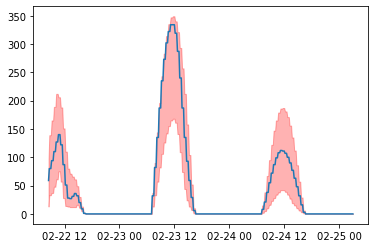

In [27]:
single_forecast = df[df["collected"] ==  dt.datetime(2021, 2, 22, 8)]

plt.plot(single_forecast.time, single_forecast.GHI)
plt.fill_between(single_forecast.time,single_forecast.GHI10, single_forecast.GHI90, color = "red", alpha = 0.3)
plt.show()

In [34]:

N = 6
b_factor = 3
N_robust = 2
N_scenarios = b_factor*N_robust

states = struct_symSX([entry("SOC")])
inputs = struct_symSX(
    [
        entry("Pbc"),
        entry("Pbd"),
        entry("Pgb"),
        entry("Pgs"),
    ]
)

w = struct_symSX(
    [
        entry("states", struct=states, repeat=N),
        entry("inputs", struct=inputs, repeat=N - 1),
    ]
)
data = struct_symSX([entry("pv"), entry("l1"), entry("l2"), entry("E")])
all_data = struct_symSX([entry("data", struct=data, repeat=N)])

scenario = struct_symSX(
    [entry("w", struct=w), entry("data", struct=data, repeat=N)]
)
scenarios = []

for k in range(N_scenarios):
    scenarios.append(entry("scenario" + str(k), struct=scenario))

scenarios = struct_symSX(scenarios)
s = scenarios(0)

In [41]:
def scenario_tree_min_max(s, N, N_robust, forecast, min_, max_):
    """
    Creates a scenario tree between provided min and max.
    Branching factor is always 3, where each scenario varies
    between min, mean, and max
    
    
    s = Casadi structure to store scenario
    N = prediction horizon
    N_robust = Robust horizon
    Forecast = Expected forecast
    Min = Minumum expected value
    Max = Maximum expected value
    """
    assert N_robust < N
    scen = 0
    for k in range(N_robust):
        for j in range(b_factor):
            scen+= 1

            
        


scenario_tree_min_max(s, N, b_factor, N_robust, single_forecast.GHI, single_forecast.GHI10, single_forecast.GHI90)

0
1
2
3
4
5
